In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Calculators.ray_cesare import ray_maker
from src.Luminosity.special_radii import get_thermr, get_photosphere, calc_photosphere
from astropy.coordinates import cartesian_to_spherical
from src.Calculators.legion_of_casters import THROUPLE_S_CASTERS
import healpy as hp
Msol_to_g = 1.989e33 # [g]
Rsol_to_cm = 6.957e10 # [cm]
den_converter = Msol_to_g / Rsol_to_cm**3
fix = 844
m = 6
Rt = (10**m)**(1/3)

In [2]:
start = 0.5 * Rt
stop = 10_000 #400 * Rt
log_start = np.log10(start)
log_stop = np.log10(stop)
log_radii = np.linspace(log_start, log_stop, 1200) #simulator units
radii = 10**log_radii

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [ ]:
X = np.load( str(m) + '/'  + fix + '/CMx_' + fix + '.npy')
Y = np.load( str(m) + '/'  + fix + '/CMy_' + fix + '.npy')
Z = np.load( str(m) + '/'  + fix + '/CMz_' + fix + '.npy')
Mass = np.load( str(m) + '/'  + fix + '/Mass_' + fix + '.npy')
T = np.load( str(m) + '/'  + fix + '/T_' + fix + '.npy')
Den = np.load( str(m) + '/'  + fix + '/Den_' + fix + '.npy')

# Convert Energy / Mass to Energy Density in CGS
Den *= den_converter 
# Convert to spherical
R, THETA, PHI = cartesian_to_spherical(X,Y,Z)
R = R.value 
THETA = THETA.value
PHI = PHI.value

In [ ]:
thetas = np.zeros(192)
phis = np.zeros(192)
observers = []
NSIDE = 4
for i in range(0,192):
    thetas[i], phis[i] = hp.pix2ang(NSIDE, i)
    thetas[i] -= np.pi/2 # Enforce theta in -pi to pi
    
    observers.append( (thetas[i], phis[i]) )

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_4239/725598790.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_4239/725598790.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


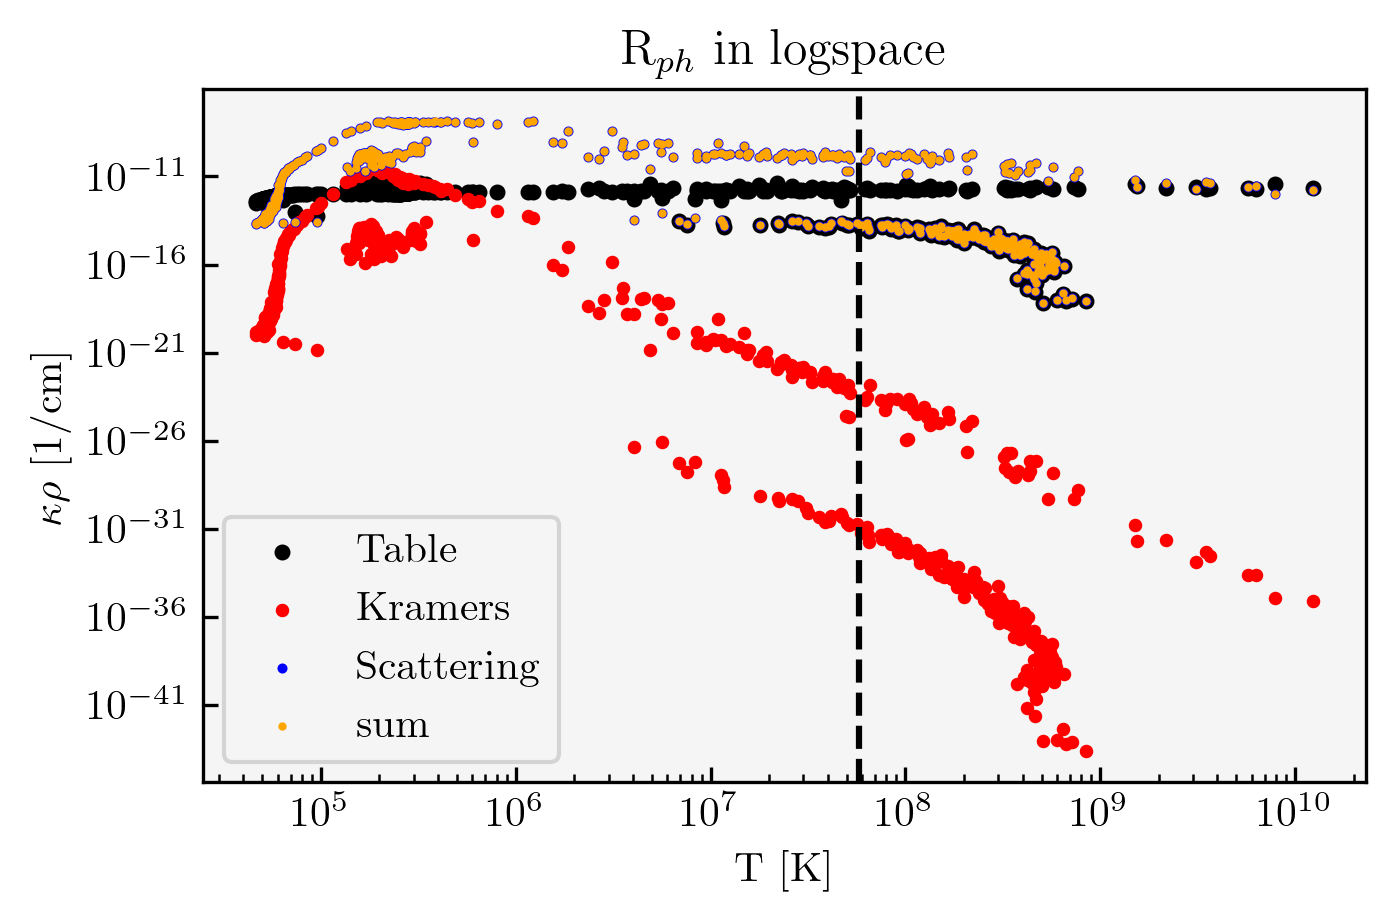

In [6]:
index = 91
data_den = rays_den[index]
data_T =rays_T[index]
kappa = plot_kappa[index]
kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
scattering = (1+0.7389) * 0.2 * data_den 
sum =  (kram + scattering) 
plt.scatter(data_T,kappa, s = 8, c = 'k', label = 'Table')
plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
plt.scatter(data_T, scattering, s = 2, c = 'b', label = 'Scattering')
plt.scatter(data_T,sum, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ in logspace')
plt.savefig('Final plot/photosphere_comparison_log.png')
plt.show()